In [1]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [3]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [4]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

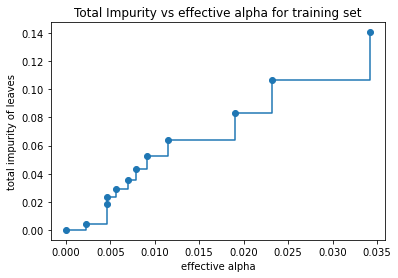

In [5]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [6]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


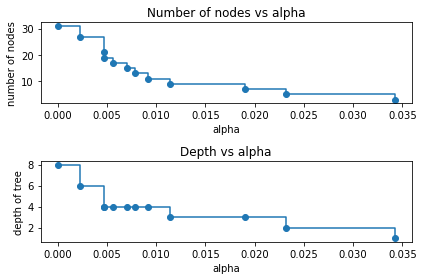

In [7]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [8]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

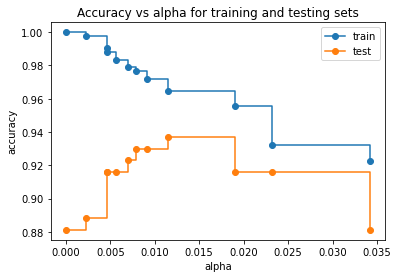

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# find max depth from best alpha

In [11]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

In [12]:
clf.tree_.max_depth

3

In [18]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
# accuracy_score(y_test, pred)
dtree.score(X_test, y_test)

0.951048951048951